# 2.1 Classifying with distance measurements

### k-Nearest Neighbors (kNN)
* supervised learning 을 이용한 방법 
* 장점: 높은 정확성, 이상치(outlier)에 둔감, 데이터에 대한 가정 불필요
* 단점: 각각의 거리 계산으로 계산 비용 높음, 많은 메모리 필요
* 자료: 수치형, 명목형
* 최근접 이웃의 개수 : 3이상, 주로 홀수로 설정함, 이상치가 많을수록 값을 조금씩 크게 줌

### General approach to kNN
1. Collect: 모든 방법
2. Prepare: 수치형 값(거리 계산을 위해 명목형도 변경해줌), 구조적 데이터가 가장 좋음
3. Analyze: 모든 방법
4. Train: 필요 없음
5. Test: 오류율(error rate) 계산
6. Use: 구조화된 수치 입력 및 출력 데이터 준비. <br>
   다음 입력에 대해 kNN 알고리즘 적용하여 입력 데이터가 어디에 속하는지 판단. <br>
   후 애플리케이션에서 판단된 클래스에 대해 어떤 액션을 취함


* 모델을 만들지 않고 데이터가 들어 올때 마다 새로 계산함 
* Feature 를 잘못선택한 경우 분류가 잘 되지 않을 수 있다. 


## 2.1.1 Prepare: Importing data with Python
python 2.7 start 

tip)shift+m : cell 합치기 

* Test Code

import numpy as np
import operator

def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group, labels

createDataSet()

* 기존 코드 사용하기 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

import kNN

In [9]:
g, l = kNN.createDataSet()
g
l

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

['A', 'A', 'B', 'B']

In [8]:
g.shape # python 2.7 L(long integer) 표시됨 

(4L, 2L)

## 2.1.2 Putting the kNN classification algorithm into action

### * 두 점 간 거리 구하기
* 피타고라스의 정리: https://ko.wikipedia.org/wiki/피타고라스의_정리 
* 두 점 사이의 거리(선분의 길이): https://www.youtube.com/watch?v=iSInGiiUOhI
* 두 점을 지나는 직선의 기울기: https://www.youtube.com/watch?v=2hKtZXyV-9o


### * 수도코드 
    1) 각각의 원소의 거리를 계산함 (1,1.1), (1,1) ... 
    2) 거리를 전부 계산한 후 정렬(오름차순 짧은 거리가 위에) 시킴 
    3) k 개 만큼 뽑고 
    4) 클래스를 찾고 
    5) return 함 

* 입력 데이터
    - inX : 입력 데이터 
    - dataSet : 전체 데이터 
    - labels : 분류 개수 
    - k : 최근접 이웃의 개수

> **def classify0(inX, dataSet, labels, k):**
   
        #---- 입력 데이터의 거리 계산 
        dataSetSize = dataSet.shape[0]

        ##-- tile 붙임 2차원 배열로 broardcasting 연산함 (for loop 보다 빠름)
        diffMat = tile(inX, (dataSetSize,1)) – dataSet

        ##-- 유클리드 거리 계산법 이용 
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        distances = sqDistances**0.5

        #---- 인덱스를 가지고 오름차순 정렬 
        sortedDistIndicies = distances.argsort()

        #---- k 개를 뽑아 몇개 나오는지 확인 
        classCount={}
        for i in range(k):
            voteIlabel = labels[sortedDistIndicies[i]]
            classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
        sortedClassCount = sorted(classCount.iteritems(),
        key=operator.itemgetter(1), reverse=True)
        return sortedClassCount[0][0]

### * 실제 코드 구현 

* [code] input data 만들기 

In [91]:
dataSet, labels = kNN.createDataSet()
dataSet
labels
k = 3

dataSetSize = dataSet.shape[0]
inx = [0, 0.3]

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

['A', 'A', 'B', 'B']

* [code] 피타고라스 정리응용 유클리드 거리 계산

In [93]:
# x값을 x축으로 프로젝션한 길이 x2 - x1, y값을 y축으로 프로젝션한 길이 y2 - y1
# inx 와 전체 데이터의 거리 계산을 위해 각 거리의 차를 구함
diffMat = np.tile(inx, (dataSetSize, 1)) - dataSet; diffMat

array([[-1. , -0.8],
       [-1. , -0.7],
       [ 0. ,  0.3],
       [ 0. ,  0.2]])

In [67]:
# 차를 제곱하고
sqDiffMat = diffMat**2; sqDiffMat

array([[ 1.  ,  0.64],
       [ 1.  ,  0.49],
       [ 0.  ,  0.09],
       [ 0.  ,  0.04]])

In [68]:
# 각 행의 열들을 더함 
sqDistances = sqDiffMat.sum(axis=1); sqDistances   
# sqDiffMat[:,0] + sqDiffMat[:,1]

array([ 1.64,  1.49,  0.09,  0.04])

In [69]:
# x^1/2루트계산해줌 
distances = sqDistances ** 0.5 ;distances

array([ 1.28062485,  1.22065556,  0.3       ,  0.2       ])

#### $ numpy.tile - for Python2
https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [15]:
import numpy as np
a = np.array([0, 1, 2]); a

array([0, 1, 2])

In [16]:
np.tile(a, 2)    # 1차원 배열
np.tile(a, (1, 2))   # 2차원 배열
np.tile(a, (2, 1))   # 2차원 배열
np.tile(a, (2, 1, 2))   # 3차원 배열

array([0, 1, 2, 0, 1, 2])

array([[0, 1, 2, 0, 1, 2]])

array([[0, 1, 2],
       [0, 1, 2]])

array([[[0, 1, 2, 0, 1, 2]],

       [[0, 1, 2, 0, 1, 2]]])

In [17]:
b = np.array([[0, 1], [2, 3]]); b
np.tile(b, 2)
np.tile(b, (1, 2))
np.tile(b, (2, 1))

array([[0, 1],
       [2, 3]])

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

array([[0, 1, 0, 1],
       [2, 3, 2, 3]])

array([[0, 1],
       [2, 3],
       [0, 1],
       [2, 3]])

* [code] 정렬하기 

In [70]:
# np.array, position 으로 정렬함 
sortedDistIndices = distances.argsort(); sortedDistIndices

array([3, 2, 1, 0], dtype=int64)

#### $ numpy.argsort
* 반환값: 배열이 정렬되었을 때의 인덱스 배열(ndarray, int) position
* 마지막 축을 기준으로 정렬(기본값)

    https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html

In [31]:
# 1차원 배열
x = np.array([3, 1, 2]); print(x)
print(np.argsort(x))
print(x[np.argsort(x)])

[3 1 2]
[1 2 0]
[1 2 3]


In [32]:
# 2차원 배열
x = np.array([[0, 3], [2, 2]]); print(a)
print(np.argsort(x, axis=0))
print(np.argsort(x, axis=1))
print(np.argsort(x, axis=-1))   # 마지막 축을 기준으로 정렬

[0 1 2]
[[0 1]
 [1 0]]
[[0 1]
 [0 1]]
[[0 1]
 [0 1]]


In [33]:
# 3차원 배열
x = np.array([[[8, 1, 4], [1, 2, 5]], [[4, 2, 7], [6, 5, 4]]]); print(x)
print(np.argsort(x, axis=2))
print(np.argsort(x))
print(np.argsort(x, axis=0))

[[[8 1 4]
  [1 2 5]]

 [[4 2 7]
  [6 5 4]]]
[[[1 2 0]
  [0 1 2]]

 [[1 0 2]
  [2 1 0]]]
[[[1 2 0]
  [0 1 2]]

 [[1 0 2]
  [2 1 0]]]
[[[1 0 0]
  [0 0 1]]

 [[0 1 1]
  [1 1 0]]]


In [34]:
# 키 값으로 정렬
x = np.array([(1, 0), (0, 1)], dtype=[('x', '<i4'), ('y', '<i4')]); x

array([(1, 0), (0, 1)],
      dtype=[('x', '<i4'), ('y', '<i4')])

#### $ numpy의 구조적 데이터 타입을 사용한 인자 정렬
 numpy.dtype: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dtype.html

데이터 타입이 섞여서 들어올때 

In [35]:
np.argsort(x, order=('x', 'y'))

array([1, 0], dtype=int64)

In [36]:
np.argsort(x, order=('y', 'x'))

array([0, 1], dtype=int64)

* [code] k 개를 뽑아 몇개 나오는지 확인 

In [37]:
# 딕셔너리 변수 준비
classCount = {}

# 거리에 맞는 label 을 얻음 
i = 0
labels[3]
voteIlabel = labels[sortedDistIndices[i]]; voteIlabel

In [71]:
# df.get 함수로 값이있으면 넣고 값이 없으면 0
classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

classCount = {}
for i in range(k):   # k 회수만큼 반복
    voteIlabel = labels[sortedDistIndices[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1

list(classCount.iteritems())

In [74]:
import operator 
operator.itemgetter(1) # 튜플에서 (0, 1) 1 번째

In [77]:
# item 의 value 값으로 정렬 시킴 
# 튜블로 값이 리턴됨
sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reverse=True); sortedClassCount

[('B', 2), ('A', 1)]

#### kNN 테스트

In [21]:
reload(kNN)
#import kNN

<module 'kNN' from 'C:\\Users\\jhfolder\\GitRepositories\\StudyML\\MachineLearninginAction\\kNN.py'>

In [89]:
kNN.classify0([0.8, 0.1], dataSet, labels)
kNN.classify0([1, 0.1], dataSet, labels)

'B'

'A'

#### $ Python3 

> 정렬

https://docs.python.org/3/howto/sorting.html
* sorted() 함수: https://docs.python.org/3/library/functions.html#sorted
    - 원본이 바뀌진 않음
    - key 인자: 정렬에 사용될 함수를 받음 (정렬기준)
    - defualt 로 문자열에 split() 이 호출
* a.sort() 
    - 원본이 바뀜 
   

In [24]:
from importlib import reload # python3
reload(kNN)

<module 'kNN' from 'C:\\Users\\jhfolder\\GitRepositories\\StudyML\\MachineLearninginAction\\kNN.py'>

In [25]:
dataSet, labels = kNN.createDataSet()
dataSet
labels
k = 3

array([[ 1. ,  1.1],
       [ 1. ,  1. ],
       [ 0. ,  0. ],
       [ 0. ,  0.1]])

['A', 'A', 'B', 'B']

In [29]:
import numpy as np

# Python3 버전
def classify0(inX, dataSet, labels, k):
    # tile() 함수를 사용하지 않아도됨 
    diffMat = inX - dataSet 
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    
    sortedDistIndices = distances.argsort()
    
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
    # import operator operator.itemgetter(1) 를 사용하지 않아도 됨 
    # classCount.get 로 정렬됨 리턴되는 값도 튜플이 아닌 key 값만 나옴 
    sortedClassCount = sorted(classCount, key=classCount.get, reverse=True)
    
    # key 값 하나만 나오니까 
    return sortedClassCount[0]

In [30]:
kNN.classify0([0.8, 0.1], dataSet, labels, 3)

'B'

# 2.2 Example: improving matches from a dating site with kNN

### 내 친구 헬렌
* 3 types of people she went out with:
    - People she didn't like
    - People she liked in small doses
    - People she liked in large doese

### Example: using kNN on results from a dating site
1. Collect: 텍스트 파일 제공됨
2. Prepare: 파이썬에서 텍스트 파일 파싱
3. Analyze: Matplotlib을 사용하여 데이터의 2차원 플롯 생성
4. Train: kNN 알고리즘에는 훈련이 필요없음
5. Test: 
   - 헬렌이 준 데이터 중 일부를 테스트 데이터로 사용하는 함수 작성.
   - 테스트 데이터는 비테스트 데이터와 구별
   - 예측된 클래스가 실제 클래스와 일치하지 않으면 오류 (검증)
6. Use: 헬렌이 입력한 몇몇 값을 바탕으로 헬렌이 좋아하는 상대인지 예측하는 간단한 명령행 프로그램 작성

## 2.2.1 Prepare: parsing data from a text file
* datingTestSet.txt
    - 1,000 entries
    - features
        - Number of frequent flyer miles earned per year
        - Percentage of time spent playing video games
        - Liters of ice cream consumed per week
    - 정답값이 들어 있음 


* datingTestSet2.txt
    - 분류를 숫자로 바꿔놓은 파일 

### file2matrix 함수
* 텍스트 파일의 데이터를 분류기가 사용할 수 있는 형태로 변환
* 입력: 파일 이름
* 출력: 훈련 데이터(행렬), 클래스 레이블(벡터)

In [98]:
filename = 'data/datingTestSet2.txt'
fr = open(filename)
fr.newlines
numberOfLines = len(fr.readlines())
numberOfLines

1000

In [102]:
# 행렬을 만들어 둠 
returnMat = np.zeros((numberOfLines, 3)); returnMat

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [118]:
# 정답 분류가 들어갈 변수 
classLabelVector = []

# 파일 읽기 
fr = open(filename)
index = 0 # 만들어둔 행렬의 row 
for line in fr.readlines():
    line = line.strip()
    listFromLine = line.split('\t')

    # 만들어둔 행렬에 feature 값을 넣음 
    returnMat[index, :] = listFromLine[0:3]  # 자동형변환됨 문자->숫자
    classLabelVector.append(int(listFromLine[-1])) # 문자
    index += 1   
    
returnMat[:5]
classLabelVector[:5]

array([[  4.09200000e+04,   8.32697600e+00,   9.53952000e-01],
       [  1.44880000e+04,   7.15346900e+00,   1.67390400e+00],
       [  2.60520000e+04,   1.44187100e+00,   8.05124000e-01],
       [  7.51360000e+04,   1.31473940e+01,   4.28964000e-01],
       [  3.83440000e+04,   1.66978800e+00,   1.34296000e-01]])

[3, 2, 1, 1, 1]

In [123]:
# label 숫자 -> 문자로 변경 하는 방법 
mapping = {1: 'didn like', 2:'small doses',  3:'large doses'}
#mapping[classLabelVector[0]]
a = [mapping[label] for label in classLabelVector]
a[:3]

['large doses', 'small doses', 'didn like']

#### $ Python3

In [37]:
import importlib 
importlib.reload(kNN)

<module 'kNN' from 'C:\\Users\\jhfolder\\GitRepositories\\StudyML\\MachineLearninginAction\\kNN.py'>

In [48]:
import numpy as np

filename = 'data/datingTestSet2.txt'

def file2matrix(filename):
    fr = open(filename)
    index = 0                     # 반환할 행렬의 로우 인덱스
    classLabelVec = []            # 클래스 레이블 변수 준비
    for line in fr.readlines():
        lineList = line.strip().split('\t')

        # List Comprehension in Python
        # 라인하나의 여러값을 하나씩
        feature = [float(value) for value in lineList[0:3]]
        classLabelVec.append(lineList[-1])

        # 미리 행렬을 만들어 두지 않고 한번에 해결 # 처음 읽은 라인이면 returnMat 변수 초기화
        returnMat = np.vstack((returnMat, feature)) \
                    if index != 0 else np.array(feature)
        index += 1

    return returnMat, classLabelVec

In [49]:
%timeit file2matrix('data/datingTestSet2.txt') 

100 loops, best of 3: 16.1 ms per loop


In [50]:
%timeit kNN.file2matrix('data/datingTestSet2.txt')

100 loops, best of 3: 5.48 ms per loop


vstack 이 파일을 한번 더 읽는것보다 성능이 좋지 않음 

## 2.2.2 Analyze: creating scatter plots with Matplotlib
  - 산포도를 통해 헬렌이 좋아할 사람을 분류할 수 있는 특징들(features)을 찾아보자
 
설치 <br>
c:작업폴더>conda install -n ml27 matplotlib

In [60]:
import matplotlib
import matplotlib.pyplot as plt

import kNN
import numpy as np

%matplotlib inline 

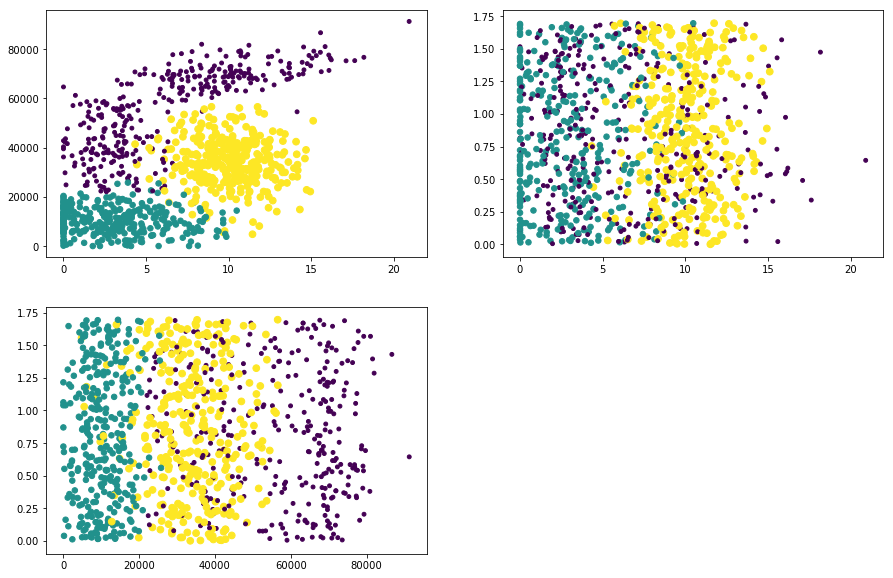

In [34]:
datingDataMat, datingLabels = kNN.file2matrix('data/datingTestSet2.txt')

plt.rc('figure', figsize=(15, 10))

fig = plt.figure()
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

# scatter(x, y, size, color, marker)
#ax.scatter(datingDataMat[:, 1], datingDataMat[:, 2])
# 비디오게임, 마일리지 
ax.scatter(datingDataMat[:, 1], datingDataMat[:, 0], 
           15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
# 게임시간, 아이스림양 
ax1.scatter(datingDataMat[:, 1], datingDataMat[:, 2],
           15.0*np.array(datingLabels), 15.0*np.array(datingLabels))
ax2.scatter(datingDataMat[:, 0], datingDataMat[:, 2],
           15.0*np.array(datingLabels), 15.0*np.array(datingLabels))

plt.show() # %matplotlib inline 하면 안해줘도됨 

비디오게임, 마일리지 datingDataMat[:, 1], datingDataMat[:, 0] 로 그린 표를 보면 잘 분할되어 있는것 처럼 보이지만 

x축은 스케일이 5 단위로 작고 y 축은 20000 단위로 굉장히 크다. x 축으로 퍼져있는 점들은 거리가 가깝게 계산되고, y 축으로 퍼져있는 점은 가까이 있는것 같아 보여도 멀리 계산될 수 있다. (두 데이터의 스케일의 차이가 거리를 판단하는데 스케일이 클수록 패널티가 될수 있다.)

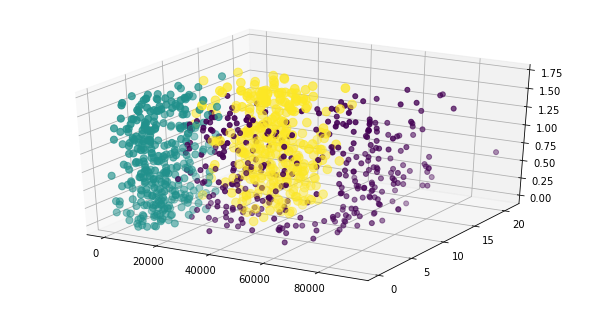

In [48]:
from mpl_toolkits.mplot3d import Axes3D

plt.rc('figure', figsize=(8, 4))

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(datingDataMat[:, 0], datingDataMat[:, 1], datingDataMat[:, 2], s=25.0*np.array(datingLabels), c=15.0*np.array(datingLabels))
plt.show()

* 특징들 간의 관계를 그림으로 분석한 결과:
     - '비디오 게임 시간'과 '연간 비행 마일 수'가 분류에 의미 있는 특징으로 결정됨
     - 즉, 헬렌이 좋아할만한 남자 친구를 찾는(분류하는) 특징으로 '비디오 게임 시간'과 '연간 비행 마일 수'를 선택

## 2.2.3 Prepare: normalizing numeric values

#### 헬렌의 예에서 '연간 항공 마일리지 수' 특징이 거리를 계산하는데 있어 큰 영향을 미친다.
#### 원인:
 * 1) 해당 특징의 값 자체가 다른 특징보다 크다
 * 2) 특징 마다 값의 범위가 다르다

#### 헬렌은 세 가지 특징이 다 같은 정도의 중요도를 갖는다고 생각한다.
  - 하지만 연간 항공 마일리지 수는 다른 특징에 비해 값 자체가 크다. (정규화 해야한다!)
      - 즉, 연간 항공 마일리지 수 특징의 값이 두 점 사이의 거리에 영향을 크게 미친다.
      - 즉, 연간 항공 마일리지 수의 중요도가 높다.

### Normalization (정규화)
 * 값의 범위를 [0, 1] 또는 [-1, 1]로 변환하는 것

    #### [0, 1]로 정규화
  
      newValue = (oldValue - min) / (max - min)
  

In [51]:
import kNN
import numpy as np

In [52]:
def autoNorm_p2(dataSet):
    # 각 특징별 최솟값, 최댓값, 범위를 구함
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    
    # 정규화된 배열로 사용할, dataSet과 같은 크기를 갖는 영행렬 준비
    normDataSet = np.zeros(np.shape(dataSet))
    
    # dataSet의 각 행에서 최솟값을 빼기 위해 행 개수 준비
    m = dataSet.shape[0]
    
    # np.tile 함수를 사용하여 최솟값 벡터를 dataSet과 행 개수가 같은 최솟값 배열로 만든 후
    # dataSet 즉 oldValue에서 빼고 그 결과를 범위 배열로 나누어서 정규화된 값을 구함
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    
    # ranges와 minVals은 테스트 값에 대해 정규화할 필요가 있으므로 반환해야 함
    return normDataSet, ranges, minVals

In [55]:
datingDataMat, datingLabels = kNN.file2matrix('data/datingTestSet2.txt')
normMat, ranges, minVals = autoNorm_p2(datingDataMat)
normMat, ranges, minVals

(array([[ 0.44832535,  0.39805139,  0.56233353],
        [ 0.15873259,  0.34195467,  0.98724416],
        [ 0.28542943,  0.06892523,  0.47449629],
        ..., 
        [ 0.29115949,  0.50910294,  0.51079493],
        [ 0.52711097,  0.43665451,  0.4290048 ],
        [ 0.47940793,  0.3768091 ,  0.78571804]]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00]),
 array([ 0.      ,  0.      ,  0.001156]))

* 한번에!

    normDataSet = np.zeros(np.shape(dataSet))<br>
    m = dataSet.shape[0]<br>
    normDataSet = dataSet - np.tile(minVals, (m,1))<br>
    normDataSet = normDataSet/np.tile(ranges, (m,1))<br>
    
--> normDataSet = (dataSet-minVals)/ranges

In [58]:
reload(kNN)
kNN.autoNorm(datingDataMat)

(array([[ 0.44832535,  0.39805139,  0.56233353],
        [ 0.15873259,  0.34195467,  0.98724416],
        [ 0.28542943,  0.06892523,  0.47449629],
        ..., 
        [ 0.29115949,  0.50910294,  0.51079493],
        [ 0.52711097,  0.43665451,  0.4290048 ],
        [ 0.47940793,  0.3768091 ,  0.78571804]]),
 array([  9.12730000e+04,   2.09193490e+01,   1.69436100e+00]),
 array([ 0.      ,  0.      ,  0.001156]))

## 2.2.4 Test: testing the classifier as a whole program

### 기계 학습 알고리즘의 정확도
  * 데이터의 90% 정도를 분류기(classifier) 학습에 사용
  * 나머지 10%를 분류기의 정확도를 구하기 위한 테스트 데이터로 사용
  * 이 10% 데이터는 임의로 선택
  * 우리가 사용하는 데이터는 특정 순서로 저장된 것이 아니므로 처음 10% 또는 마지막 10%를 테스트 데이터로 선택하는 것이 임의로 10% 선택하는 것과 다를 바 없음
  
### 에러율(error rate)
  * error rate = 잘못 분류된 데이터 수 / 전체 데이터 수
  * error rate = 0 ==> 완벽한 분류기
  * error rate = 1.0 ==> 항상 잘못 분류하는 분류기

In [106]:
#import kNN
reload(kNN)
import numpy as np

filename = 'data/datingTestSet2.txt'

In [107]:
def datingClassTest(filename, k=3):
    # 각종 변수 준비
    hoRatio = 0.10                    # 테스트 데이터 비율 (10%)
    
    datingDataMat, datingLabels = kNN.file2matrix(filename)
    
    # 정규화된 훈련데이터
    normMat, ranges, minVals = kNN.autoNorm(datingDataMat)
    m = normMat.shape[0]              # 데이터 총 개수, 로우 수
    numTestVecs = int(m * hoRatio)    # 테스트 데이터 개수
    errorCount = 0.0
        
    for i in range(numTestVecs):
        # 예측하고자 하는 값, train 총 데이터  
        classifierResult = kNN.classify0(normMat[i, :], normMat[numTestVecs:m, :], \
                                         datingLabels[numTestVecs:m], 3)        
        # classifierResult 예측, datingLabels 실제 
        if i%20 == 0 or (classifierResult != datingLabels[i]):
            print("the classifier came back with: %d, the real answer is: %d"\
                    % (classifierResult, datingLabels[i]))
            if (classifierResult != datingLabels[i]):
                errorCount += 1.0
                print("!!!NOT MATCHED!!!")
            
    print("the total correct rate is: %f" % (1-errorCount/float(numTestVecs)))

In [108]:
datingClassTest(filename)

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 2
!!!NOT MATCHED!!!
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
!!!NOT MATCHED!!!
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
!!!NOT MATCHED!!!
the classifier came back with: 2, the real answer is: 3
!!!NOT MATCHED!!!
the classifier came back with: 3, the real answer is: 1
!!!NOT MATCHED!!!
the total correct rate is: 0.950000


In [131]:
reload(kNN)
kNN.datingClassTest(filename, k=10, hoRatio=0.10)

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 3
!!!NOT MATCHED!!!
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 1
!!!NOT MATCHED!!!
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 3
!!!NOT MATCHED!!!
the classifier came back with: 2, the real answer is: 1
!!!NOT MATCHED!!!
the total correct rate is: 0.960000


## 2.2.5 Use: putting together a useful system
새로운 입력으로 분류 하기 

In [118]:
reload(kNN)
kNN.classifyPerson(filename) # input data 도 정규화 시켜서 넘김 

percentage of time spent playing video games?50
frequent flier miles earned per year?1
liters of ice cream consumed per year?10
You will probably like this person:  in large doses


# 2.3 Example: a handwriting recognition system

필기 인식 

1. Collect: Text file provided.
2. Prepare: Write a function to convert from the image format to the list format used in our classifier, classify0().
3. Analyze: We’ll look at the prepared data in the Python shell to make sure it’s correct.
4. Train: Doesn’t apply to the kNN algorithm.
5. Test: Write a function to use some portion of the data as test examples. The test examples are classified against the non-test examples. If the predicted class doesn’t match the real class, you’ll count that as an error.
6. Use: Not performed in this example. You could build a complete program to extract digits from an image, such a system used to sort the mail in the United States.

## 2.3.1 Prepare: converting images into test vectors 

* 데이터는 0과 1로 표현되어 있음 
* 숫자 이미지 크기 32x32
* 훈련용 데이터 2000개 
    - 번호별(0~9) 약 200개 표본
    - 번호별 디럭토리 존재
* 테스트 데이터 900개

* 2차원 이미지 데이터를 1차원 데이터로 변환 
    - 32x32 -> 1x1024


In [6]:
#reload(kNN)
import numpy as np 

filename = 'data/digits/testDigits/0_13.txt'

def img2vector(filename):
    returnVect = np.zeros((1,1024))
    fr = open(filename)
    
    # 2차원 행과 열을 돌면서 1차원 한줄로 만듬 
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            # 인스턴스를 row 로 넣기 위해서 
            # row 가 1개인 2차원으로 변경 [[0,N],[0,N]...]
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [9]:
testVector = img2vector(filename)
testVector.shape

(1L, 1024L)

In [51]:
testVector

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.]])

----- kNN 에서의 거리 계산을 위해서 1차원 데이터를 이용했지만 벡터 위치가 중요한 경우 kNN 을 이용하기 힘들다. (차원의 형태를 유지해야하는 경우)

## 2.3.2 Test: kNN on handwritten digits


* [code] train 데이터 만들기 handwritingClassTest 
    
    train 데이터와 label 데이터를 파일에서 읽어들여 trainingMat(2차원), hwLabels 로 만듬

In [21]:
import os

In [46]:
# 인자로 받은 디렉토리의 파일명을 수집하여 리스트로 보여줌 
trainingFileList = os.listdir('data/digits/trainingDigits')
trainingFileList[:10]
m = len(trainingFileList); m

# 0 벡터 : feature 정보를 담을 변수 
trainingMat = np.zeros((m,1024)); trainingMat

# 정답 데이터를 담을 변수
hwLabels = []

['0_0.txt',
 '0_1.txt',
 '0_10.txt',
 '0_100.txt',
 '0_101.txt',
 '0_102.txt',
 '0_103.txt',
 '0_104.txt',
 '0_105.txt',
 '0_106.txt']

1934

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
# for 문: 폴더에서 파일명을 가져와 9_123.txt > 를 9의 정답 데이터로 만듬 
fileNameStr = trainingFileList[0]; fileNameStr
fileStr = fileNameStr.split('.')[0]; fileStr
classNumStr = int(fileStr.split('_')[0]); classNumStr
hwLabels.append(classNumStr); hwLabels
trainingMat[0,:] = kNN.img2vector('data/digits/trainingDigits/%s' % fileNameStr); trainingMat[0, :]
# trainingMat 는 미리 만들어 놓은 0 행렬 벡터 

'0_0.txt'

'0_0'

0

[0, 0, 0, 0, 0, 0]

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [61]:
reload(kNN)

<module 'kNN' from 'kNN.py'>

In [62]:
kNN.handwritingClassTest('data/digits/')

the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 7, the real answer is: 1
----- error!! 172 --------------
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 9, the real answer is: 3
----- error!! 279 --------------
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 3
----- error!! 327 --------------
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 3, the real answer is: 5
----- error!! 520 --------------
the classifier came back with: 6, the real answer is: 5
----- error!! 521 --------------
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 8
----- error!! 769 --------------
the classifier cam

# 2.4 Summary
* 특징 instance-based learning 의 한 예

* 장점 
    - 간단, 효과적

* 단점 
    - 전체데이터를 다뤄야 해서 큰 저장소 필요
    - 모든 데이터에 대한 거리계산 (연산부담)
    - 데이터 구조에 대한 정보를 얻을 수 없음
        - 같은 부류의 데이터에 대한 평균, 모범예 등을 알 수 없음 